# Imports

In [26]:
import numpy as np
import random
import pylab
from scipy import stats

import pandas as pd
from sklearn.datasets import make_blobs
import plotly.express as px
import seaborn as sns
from sklearn.tree import export_graphviz
from matplotlib import pyplot as plt
# import plotly as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder

from pandas_profiling import ProfileReport

# Data importing

In [27]:
df_train = pd.read_csv('/Users/user/Desktop/netology/ml/hw_2_train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [28]:
df_test = pd.read_csv('/Users/user/Desktop/netology/ml/hw_2_test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Data understanding

In [29]:
profile = ProfileReport(df_train)
profile

/Users/user/anaconda3/lib/python3.7/site-packages/pandas_profiling/describe.py:392: FutureWarning:

The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.



Number of variables,12
Number of observations,891
Total Missing (%),8.1%
Total size in memory,83.7 KiB
Average record size in memory,96.1 B
Numeric,6
Categorical,4
Boolean,1
Date,0
Text (Unique),1
Rejected,0


/Users/user/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning:

invalid value encountered in true_divide

/Users/user/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning:

invalid value encountered in double_scalars

/Users/user/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning:

invalid value encountered in greater

/Users/user/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning:

invalid value encountered in less



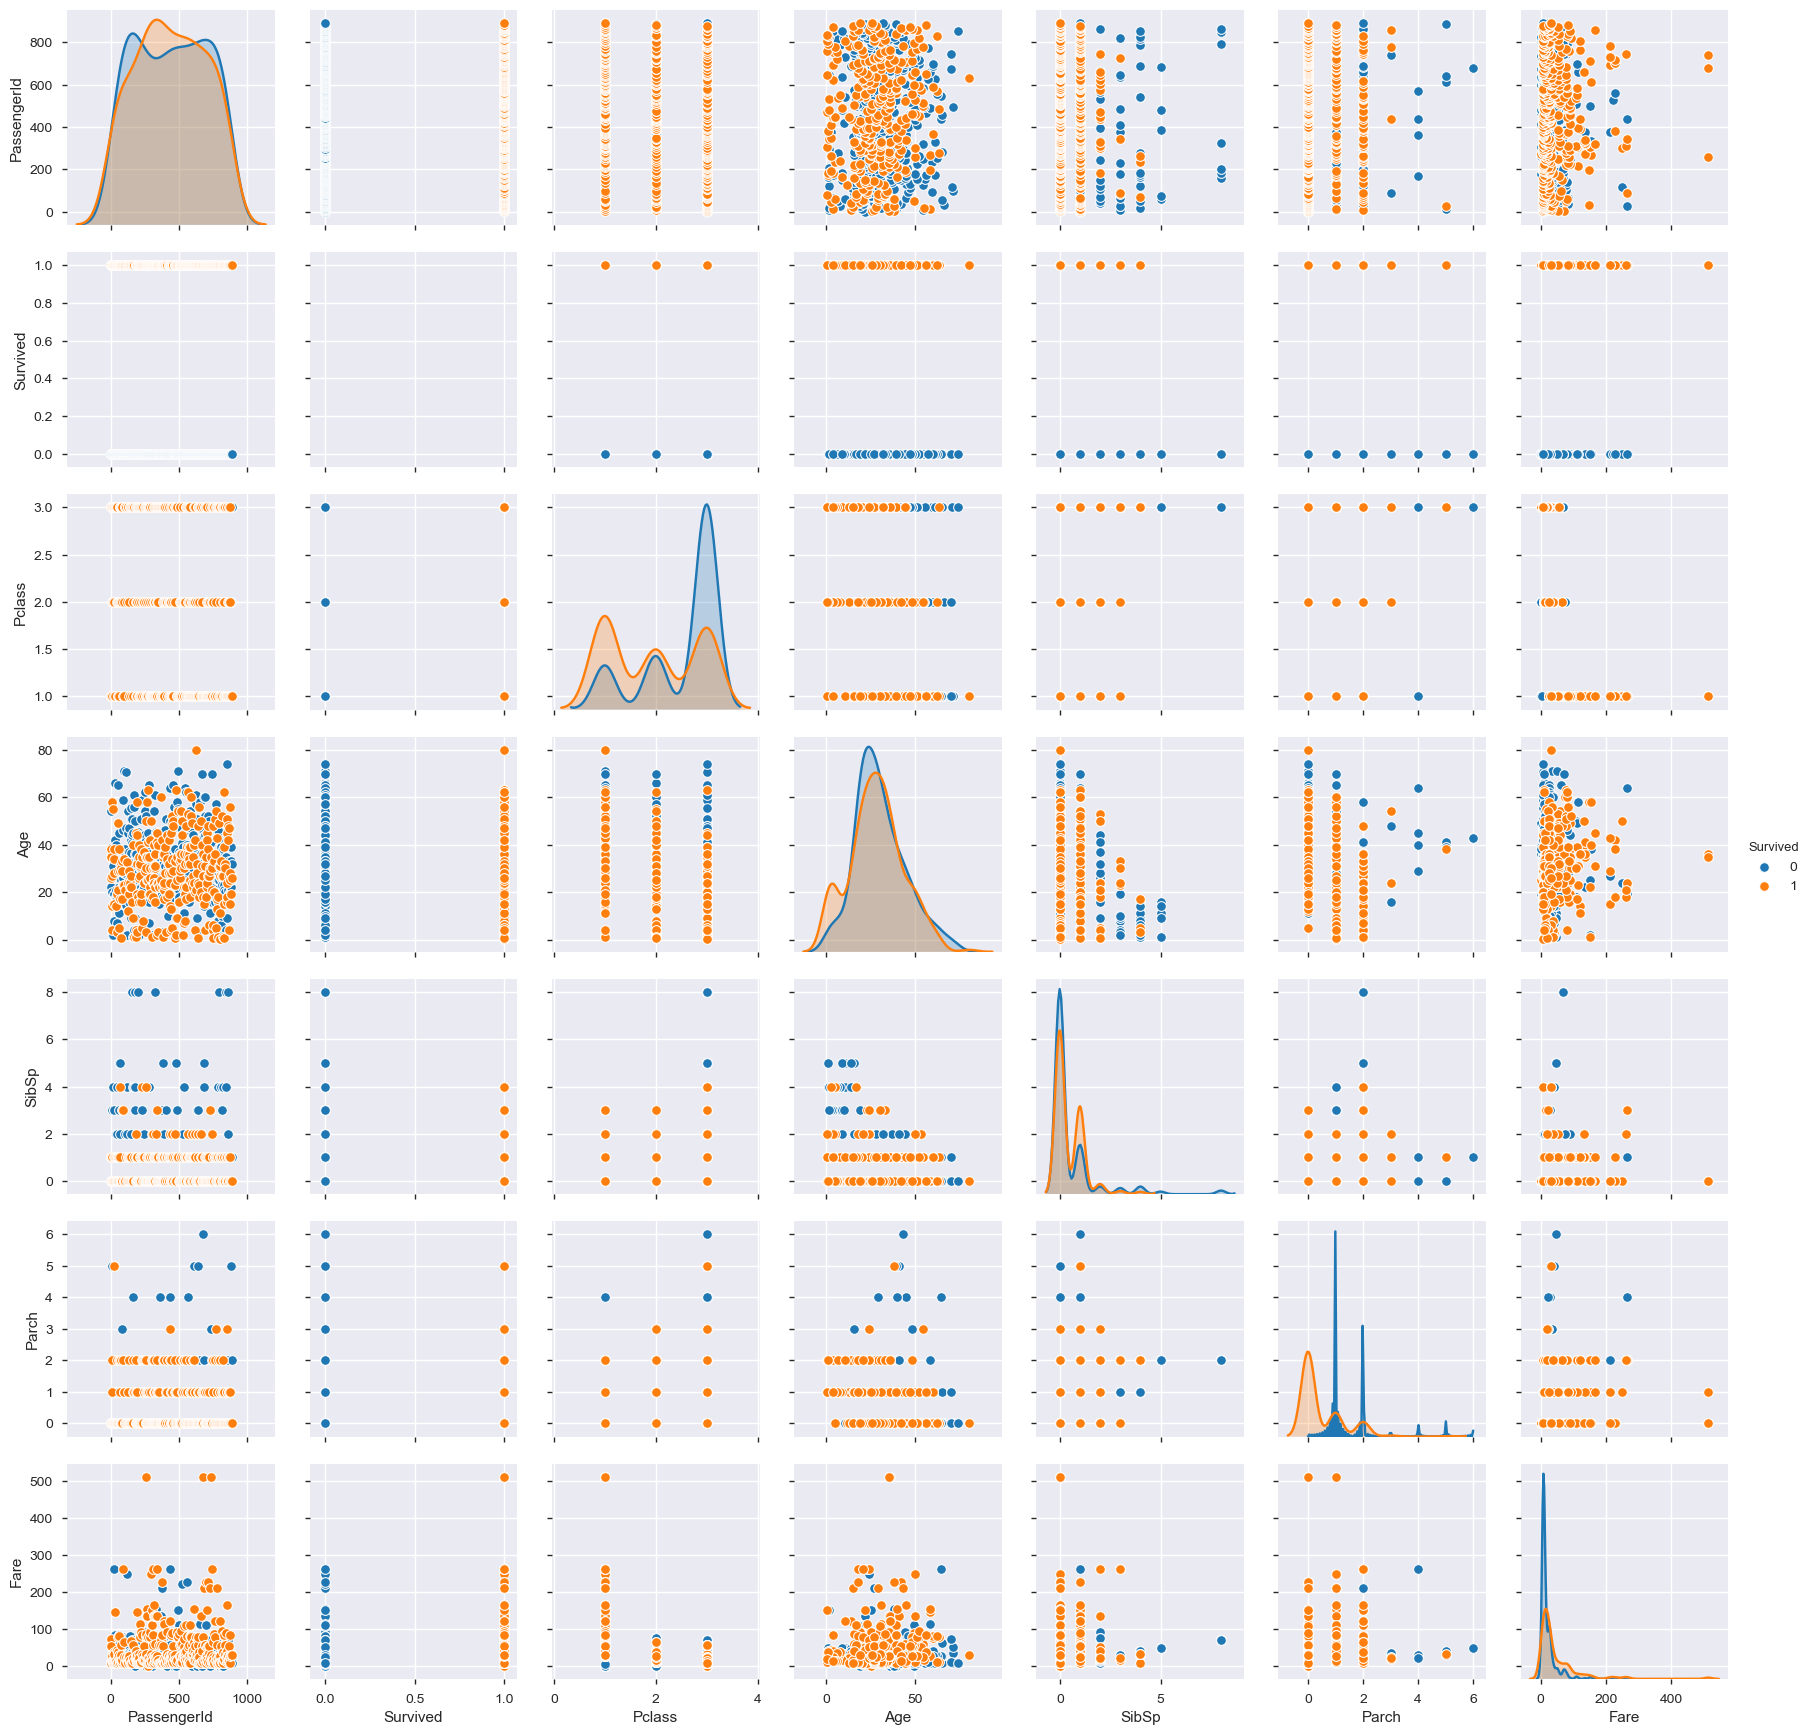

In [30]:
sns.pairplot(df_train, hue='Survived', diag_kind="kde")

# Feature engineering

-PassengerId
-Survived
Pclass
-Name
-Sex
-Age
-SibSp
-Parch
-Ticket
-Fare
-Cabin
Embarked

Male

In [31]:
df_train_format = df_train
df_test_format = df_test

In [32]:
# sex
df_train_format['Male'] = (df_train_format['Sex'] == 'male').astype(int)
df_train_format.drop(columns = ['Sex'], inplace= True)

df_test_format['Male'] = (df_test_format['Sex'] == 'male').astype(int)
df_test_format.drop(columns = ['Sex'], inplace= True)



In [33]:
# age
df_train_format['Age'].fillna(df_train_format['Age'].median(), inplace=True)

df_test_format['Age'].fillna(df_test_format['Age'].median(), inplace=True)

In [34]:
# ticket
df_train_format.drop(columns = ['Ticket'], inplace= True)

df_test_format.drop(columns = ['Ticket'], inplace= True)

In [35]:
# Name
df_train_format.drop(columns = ['Name'], inplace= True)

df_test_format.drop(columns = ['Name'], inplace= True)

In [36]:
# Cabin
df_train_format.drop(columns = ['Cabin'], inplace= True)

df_test_format.drop(columns = ['Cabin'], inplace= True)

In [37]:
# Embarked
df_train_format.drop(columns = ['Embarked'], inplace= True)

df_test_format.drop(columns = ['Embarked'], inplace= True)

In [38]:
# Pclass
enc = OneHotEncoder(handle_unknown='ignore')

enc_df_train = pd.DataFrame(enc.fit_transform(df_train_format[['Pclass']]).toarray(), 
                            columns=['is_1_class','is_2_class','is_3_class'])
enc_df_test = pd.DataFrame(enc.fit_transform(df_test_format[['Pclass']]).toarray(), 
                           columns=['is_1_class','is_2_class','is_3_class'])

df_train_format = pd.concat([df_train_format, enc_df_train], axis=1)
df_test_format  = pd.concat([df_test_format, enc_df_test], axis=1)

df_train_format.drop(columns = ['Pclass'], inplace= True)
df_test_format.drop(columns = ['Pclass'], inplace= True)


In [40]:
# Fare
df_train_format['Fare'].fillna(df_train_format['Fare'].median(), inplace=True)
df_test_format['Fare'].fillna(df_test_format['Fare'].median(), inplace=True)

In [41]:
df_test_format.head()

,PassengerId,Age,SibSp,Parch,Fare,Male,is_1_class,is_2_class,is_3_class
0,892,34.5,0,0,7.8292,1,0.0,0.0,1.0
1,893,47.0,1,0,7.0000,0,0.0,0.0,1.0
2,894,62.0,0,0,9.6875,1,0.0,1.0,0.0
3,895,27.0,0,0,8.6625,1,0.0,0.0,1.0
4,896,22.0,1,1,12.2875,0,0.0,0.0,1.0


In [42]:
df_train_format.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Male,is_1_class,is_2_class,is_3_class
0,1,0,22.0,1,0,7.2500,1,0.0,0.0,1.0
1,2,1,38.0,1,0,71.2833,0,1.0,0.0,0.0
2,3,1,26.0,0,0,7.9250,0,0.0,0.0,1.0
3,4,1,35.0,1,0,53.1000,0,1.0,0.0,0.0
4,5,0,35.0,0,0,8.0500,1,0.0,0.0,1.0


# Modeling

In [43]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(df_train_format[['PassengerId','Age','SibSp','Parch','Fare','Male',
                         'is_1_class','is_2_class', 'is_3_class']],  df_train_format[['Survived']], test_size=0.2, random_state=0)

In [44]:
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

## Optimal depth

In [ ]:
clf = test_clf(DecisionTreeClassifier(max_depth=3), X_train[['Age', 'Fare']], 
               y_train.values.reshape(-1), fit_clf=True)

In [50]:
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [51]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score

In [52]:
accuracy_score(y_test, clf.predict(X_test))

0.8212290502793296

In [53]:
confusion_matrix(y_test, clf.predict(X_test))

array([[96, 14],
       [18, 51]])

In [54]:
clf = DecisionTreeClassifier(max_depth=5)
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [55]:
accuracy_score(y_test, clf.predict(X_test))

0.8100558659217877

In [56]:
confusion_matrix(y_test, clf.predict(X_test))

array([[98, 12],
       [22, 47]])

In [57]:
clf = DecisionTreeClassifier(max_depth=2)
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [58]:
accuracy_score(y_test, clf.predict(X_test))

0.7821229050279329

In [59]:
confusion_matrix(y_test, clf.predict(X_test))

array([[88, 22],
       [17, 52]])

## Main features

''

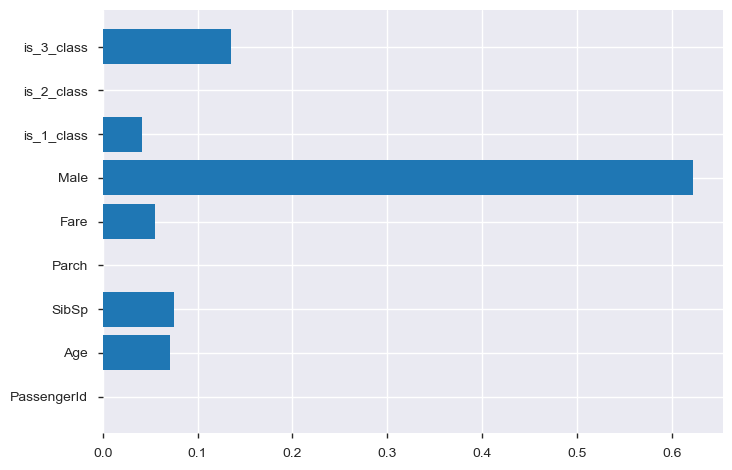

In [61]:
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_train, y_train)

plt.barh(np.arange(len(clf.feature_importances_)), clf.feature_importances_)
plt.yticks(np.arange(len(X_train.columns)),X_train.columns)

''

# Visualisation

In [62]:
# !pip install pydotplus

In [63]:
# ! pip install graphviz

/Users/user/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).



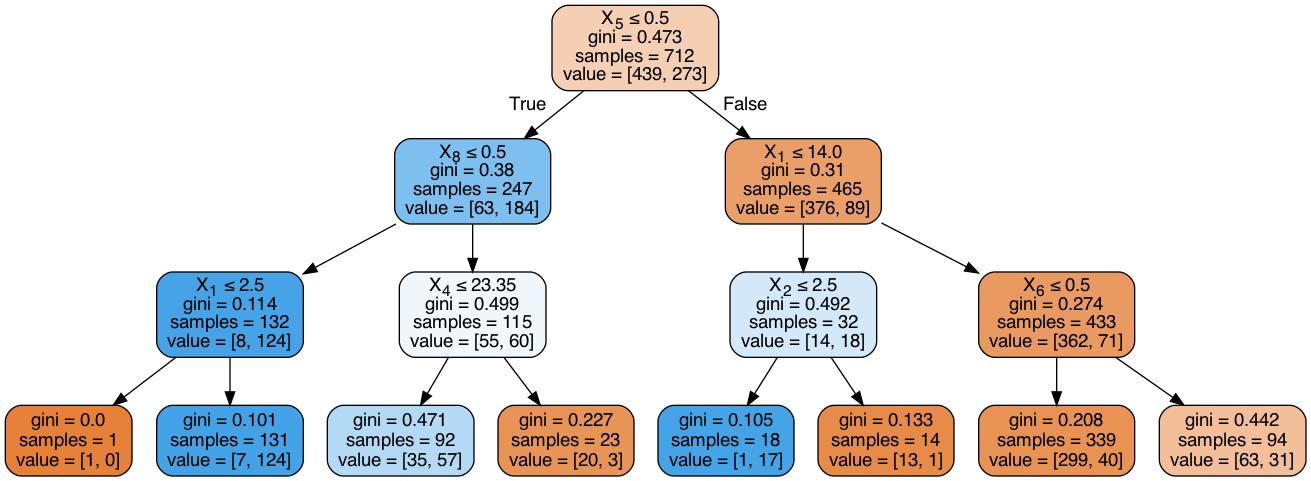

In [64]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())